In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split

In [196]:
from graphviz import Source
from IPython.display import display, SVG

In [197]:
train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
test = pd.read_json('/home/stas/Загрузки/dataset_209691_15.txt')

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [199]:
X = train.drop(['Вид'], axis=1)
y = train['Вид']

In [200]:
y = pd.get_dummies(y, dtype=int)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   котик    1000 non-null   int64
 1   собачка  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [201]:
y = y['собачка']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: собачка
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
X_train.shape, X_test.shape

((750, 5), (250, 5))

In [204]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
261,17,20.4,1,0,0
415,26,31.2,1,1,0
851,12,4.8,1,0,1
142,30,36.0,1,1,0
616,6,2.4,1,0,1


In [205]:
clf = DecisionTreeClassifier(criterion='entropy')

In [206]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [207]:
clf.score(X_train, y_train)

1.0

In [208]:
clf.score(X_test, y_test)

1.0

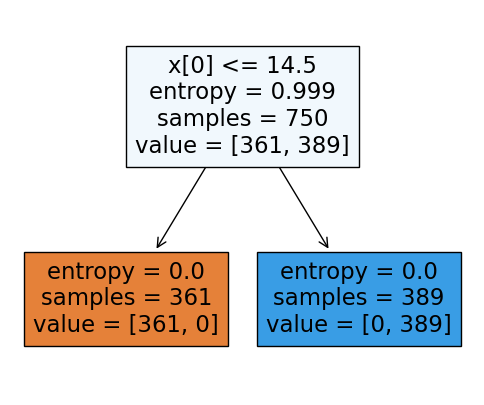

In [209]:
plt.figure(figsize=(6, 5))
plot_tree(clf, filled=True);

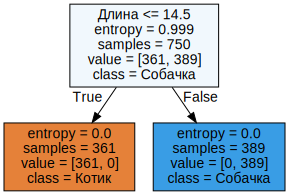

In [210]:
graph = Source(export_graphviz(clf, out_file=None,
                               feature_names=list(X),
                               class_names=['Котик', 'Собачка'],
                               filled = True))
display(SVG(graph.pipe(format='svg')))

In [211]:
test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,19,22.8,1,1,0
1,22,26.4,1,1,0
2,25,30.0,1,1,0
3,26,31.2,1,1,0
4,28,33.6,1,1,0


In [212]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               100 non-null    int64  
 1   Высота              100 non-null    float64
 2   Шерстист            100 non-null    int64  
 3   Гавкает             100 non-null    int64  
 4   Лазает по деревьям  100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.7 KB


In [213]:
result = clf.predict(test)

In [214]:
sum(result)

47